# Identifying the Most Predictive Risk Factors for Diabetes

## Step 1: Choose the Dataset
- **Dataset:** Use the `diabetes_binary_health_indicators` dataset.
  - **Reason:** This dataset includes a binary diabetes status (`Diabetes_binary`) and various potential predictors of diabetes risk.

## Step 2: Data Cleaning and Preparation
1. **Check for Missing Values:**
   - Identify and handle any missing data using imputation or removal methods.
2. **Scale Numeric Variables:**
   - Normalize variables like BMI to ensure consistent scaling across features.
3. **Encode Categorical Variables:**
   - Apply one-hot encoding to any categorical variables for model compatibility.


## Step 3: Exploratory Data Analysis (EDA)
1. **Correlation Analysis:**
   - Compute the correlation between `Diabetes_binary` and other variables to identify strong relationships.
2. **Visualize Distributions:**
   - Use box plots or histograms to analyze the distribution of numerical features (e.g., BMI, Age) across diabetes status.
3. **Inspect Relationships:**
   - Explore the relationships between key features (e.g., Age, BMI, HighBP) and diabetes risk through scatter plots or pair plots.


## Step 4: Feature Selection
1. **Perform Feature Importance Analysis:**
   - **Correlation Analysis:** Identify variables with strong correlations to `Diabetes_binary`.
   - **Logistic Regression:** Use coefficients to evaluate feature significance.
   - **Decision Tree or Random Forest:** Analyze feature importance scores.
2. **Statistical Tests:**
   - Apply tests like chi-square or t-tests to determine statistically significant predictors.


## Step 5: Model Building and Evaluation
1. **Train Predictive Models:**
   - Use algorithms like:
     - **Logistic Regression**
     - **Random Forest Classifier**
     - **Gradient Boosting Models (e.g., XGBoost)**
2. **Evaluate Performance:**
   - Metrics:
     - **Accuracy:** Overall correctness of the model.
     - **F1-Score:** Balance between precision and recall.
     - **AUC-ROC:** Ability of the model to distinguish between classes.
3. **Analyze Feature Importance:**
   - Examine the most critical factors influencing predictions using the model's outputs.


## Step 6: Insights and Visualization
1. **Rank Predictive Factors:**
   - Determine the most predictive features (e.g., BMI, Age, HighBP) based on:
     - Logistic regression coefficients.
     - Feature importance scores from tree-based models.
2. **Create Visualizations:**
   - Bar plots for feature importance rankings.
   - **SHAP (SHapley Additive exPlanations):**
     - Generate summary plots to explain feature contributions to the model's predictions.


### Loading and Understanding the dataset:

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/Users/maralbarkhordari/Desktop/Diabetes Health Indicators Dataset/diabetes_binary_health_indicators_BRFSS2015.csv'  
data = pd.read_csv(file_path)

# Display the dataset's structure and first few rows
print(data.info())  # Overview of columns, data types, and non-null counts
print(data.head())  # Preview the first five rows of the dataset

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)

# Check for duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Step 2: Data Cleaning and Preparation

To clean the dataset, we will:

1. **Remove Duplicates**: Ensure unique observations by eliminating duplicate entries.
2. **Scale Numerical Features**: Normalize variables like BMI and Age for consistency across features (important for model training).
3. **Confirm Encoding**: Ensure binary and categorical variables are properly encoded (e.g., already 0/1 or suitable for one-hot encoding).


In [3]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()
print(f"Dataset size after removing duplicates: {data_cleaned.shape}")

# Scale numerical features (e.g., BMI and Age) using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['BMI', 'Age']
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Verify the scaled data
print("\nSample of scaled numerical features:")
print(data_cleaned[numerical_features].head())


Dataset size after removing duplicates: (229474, 22)

Sample of scaled numerical features:
        BMI       Age
0  0.325581  0.666667
1  0.151163  0.500000
2  0.186047  0.666667
3  0.174419  0.833333
4  0.139535  0.833333


/var/folders/05/303440ms08n6px86jhmyxqxm0000gn/T/ipykernel_30106/4210445358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])


### Cleaning Process Results

- **Duplicates Removed**: The dataset now contains **229,474 unique rows**.
- **Numerical Features Scaled**: 
  - **BMI** and **Age** are normalized between **0 and 1** for consistency in modeling.


### Step 3: Exploratory Data Analysis (EDA)

Next, we will:

- **Analyze Correlations**: Identify relationships between `Diabetes_binary` and other variables.
- **Visualize Distributions**: Inspect numerical variables like `BMI` and `Age` for trends.
- **Explore Relationships**: Look at key features like `HighBP`, `BMI`, and `Age` in relation to `Diabetes_binary`.


Correlation with Diabetes_binary:
 Diabetes_binary         1.000000
GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


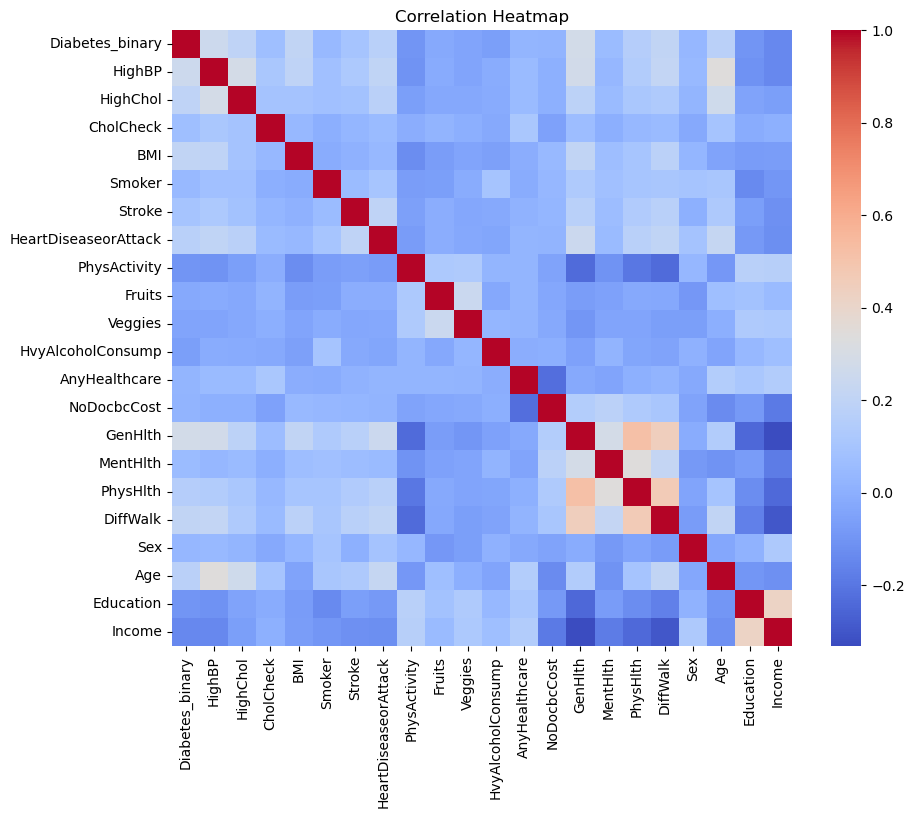

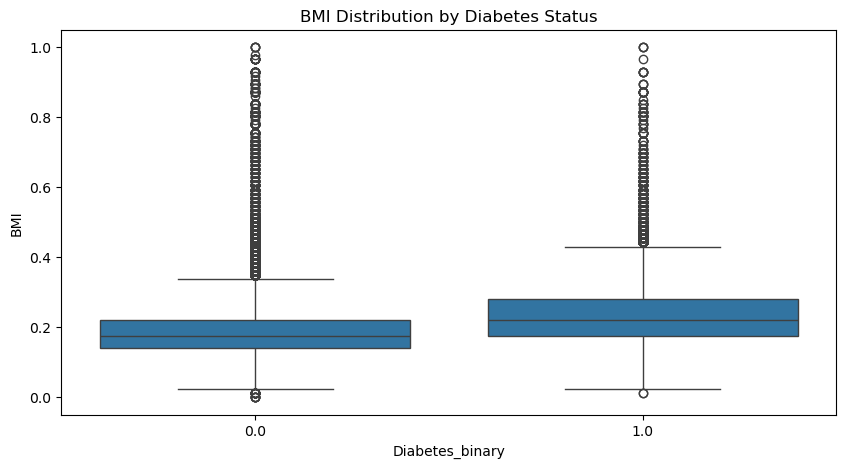

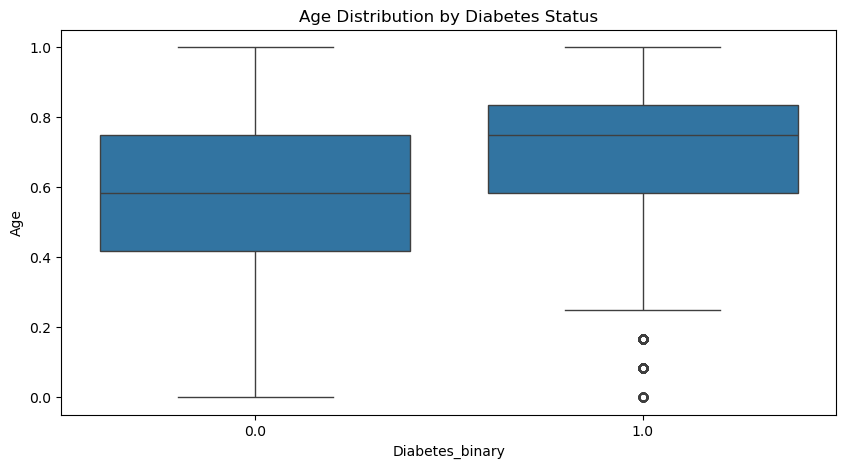

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations
correlations = data_cleaned.corr()
diabetes_corr = correlations['Diabetes_binary'].sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n", diabetes_corr)

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Visualize distribution of BMI and Age by diabetes status
plt.figure(figsize=(10, 5))
sns.boxplot(x='Diabetes_binary', y='BMI', data=data_cleaned)
plt.title('BMI Distribution by Diabetes Status')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Diabetes_binary', y='Age', data=data_cleaned)
plt.title('Age Distribution by Diabetes Status')
plt.show()


# Exploratory Data Analysis Insights

## Correlation Analysis

### Strongest Positive Correlations with `Diabetes_binary`:
- **GenHlth (0.28):** General health has the strongest positive correlation with diabetes.
- **HighBP (0.25):** High blood pressure is a significant predictor.
- **DiffWalk (0.21):** Difficulty walking is also strongly correlated.
- **BMI (0.21):** Higher BMI levels are associated with diabetes risk.
- **HighChol (0.19):** High cholesterol is moderately correlated.

### Negative Correlations with `Diabetes_binary`:
- **PhysActivity (-0.10):** Physical activity reduces diabetes risk.
- **Education (-0.10):** Higher education is negatively correlated.
- **Income (-0.14):** Higher income shows reduced diabetes prevalence.

## Visualizations

### Correlation Heatmap:
- Visualizes how features relate to one another and to `Diabetes_binary`.

### BMI Distribution by Diabetes Status:
- Median BMI is higher for individuals with diabetes.

### Age Distribution by Diabetes Status:
- Individuals with diabetes tend to be older.


### Step 4: Feature Selection

We will now identify the most predictive features using:

1. **Logistic Regression coefficients**  
2. **Random Forest feature importance scores**  
3. **Statistical tests** like chi-square for categorical features


## Feature Selection Techniques for Predictive Features

To identify the most predictive features, I will use the following techniques:

1. **Logistic Regression Coefficients**: To understand linear relationships.
2. **Random Forest Feature Importance**: To capture nonlinear relationships.
3. **Chi-Square Tests**: For categorical features.

Let's proceed step by step.


### Logistic Regression Coefficients
Logistic regression helps evaluate the linear impact of each feature on diabetes prediction.


### Random Forest Feature Importance
Random forests provide importance scores for features based on how often they are used to split nodes.


In [6]:
data_cleaned.to_csv('cleaned_diabetes_data.csv', index=False)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Split data into features and target
X = data_cleaned.drop(columns=['Diabetes_binary'])
y = data_cleaned['Diabetes_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression for Feature Importance
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest for Feature Importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Chi-Square for Categorical Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Chi-square requires non-negative values
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_scaled, y)

# Display feature importance results
log_reg_importance = pd.DataFrame({
    'Feature': X.columns,
    'LogReg_Coefficient': np.abs(log_reg.coef_[0])
}).sort_values(by='LogReg_Coefficient', ascending=False)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_Importance': rf.feature_importances_
}).sort_values(by='RandomForest_Importance', ascending=False)

chi2_importance = pd.DataFrame({
    'Feature': X.columns,
    'ChiSquare_Score': chi2_selector.scores_
}).sort_values(by='ChiSquare_Score', ascending=False)

# Combine all results
feature_importance = log_reg_importance.merge(rf_importance, on='Feature').merge(chi2_importance, on='Feature')
feature_importance = feature_importance.sort_values(by=['LogReg_Coefficient', 'RandomForest_Importance'], ascending=False)


# Display results in a tabular format
print("Top Features Based on Combined Importance Metrics:\n")
print(feature_importance.head(10))  # Show the top 10 features



Top Features Based on Combined Importance Metrics:

                Feature  LogReg_Coefficient  RandomForest_Importance  \
0                   BMI            4.974939                 0.182171   
1                   Age            1.446847                 0.123578   
2             CholCheck            1.343082                 0.003719   
3     HvyAlcoholConsump            0.770824                 0.007727   
4                HighBP            0.735967                 0.041603   
5              HighChol            0.558425                 0.025570   
6               GenHlth            0.508715                 0.067688   
7                   Sex            0.266721                 0.028051   
8  HeartDiseaseorAttack            0.205761                 0.017694   
9              DiffWalk            0.134309                 0.023282   

   ChiSquare_Score  
0       309.992581  
1       812.103743  
2        48.904140  
3       937.401148  
4      8098.548237  
5      4869.312739  
6      3

## Feature Selection Objective

The goal here is not to build the final model but to identify the most predictive features for diabetes. Different methods capture various aspects of feature importance:

- **Logistic Regression**: Focuses on linear relationships.
- **Random Forest**: Captures non-linear interactions.
- **Chi-Square**: Measures statistical dependence for categorical variables.

By combining their outputs, we gain a robust understanding of the most relevant features.

## Modeling and Iteration

Once we identify the key features, we proceed with the following steps:

1. **Model Selection**:
   - Use a single model (e.g., Logistic Regression or Random Forest) for initial prediction.

2. **Model Analysis**:
   - Evaluate the model's weaknesses (e.g., underfitting, overfitting).
   - Address these issues by tuning hyperparameters or exploring alternative models.


## Feature Importance Analysis

The feature importance analysis indicates that the following variables are the most predictive of diabetes risk, as identified by multiple selection techniques:

### Top Predictive Features:

- **BMI**:
  - High coefficient in Logistic Regression.
  - Strong feature importance in Random Forest.
  - High Chi-Square score, suggesting statistical significance.

- **Age**:
  - Strong predictor across all methods, indicating older individuals are at greater risk.

- **HighBP (High Blood Pressure)**:
  - Extremely high Chi-Square score.
  - Relevant in Random Forest and Logistic Regression.

- **HighChol (High Cholesterol)**:
  - Shows importance in Random Forest and statistical tests.

- **GenHlth (General Health)**:


In [11]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the cleaned dataset
file_path = '/Users/maralbarkhordari/Desktop/Diabetes Health Indicators Dataset/cleaned_diabetes_data.csv'  
data_cleaned = pd.read_csv(file_path)

# Target variable
y = data_cleaned['Diabetes_binary']

# Select the top features for the model
selected_features = ['BMI', 'Age', 'HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'HeartDiseaseorAttack']
X_selected = data_cleaned[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Build the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Display evaluation metrics
evaluation_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

print("Evaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.2f}")


Evaluation Metrics:
Accuracy: 0.85
Precision: 0.53
Recall: 0.13
F1-Score: 0.21
ROC-AUC: 0.80


### Logistic Regression Model Performance Summary

#### Observations:
- **Accuracy (85%)**: High overall correctness in predictions.
- **Precision (53%)**: The model is moderately precise in identifying true positives (diabetes cases) among positive predictions.
- **Recall (13%)**: A low recall indicates that the model struggles to identify many true diabetes cases.
- **F1-Score (21%)**: The balance between precision and recall is low, reflecting the poor recall.
- **ROC-AUC (80%)**: The model has a good ability to differentiate between diabetic and non-diabetic cases.

#### Recommendations:
1. **Address the Class Imbalance**:
   - The imbalance in diabetes cases (diabetes vs. non-diabetes) likely affects the model's ability to recall diabetic cases.
   - Techniques to address this:
     - **Class Weight Adjustment**: Add `class_weight='balanced'` to the Logistic Regression model.
     - **Resampling**: Apply oversampling (e.g., SMOTE) or undersampling methods to balance the classes.

2. **Explore Nonlinear Models**:
   - Models like **Random Forest** or **XGBoost** can capture more complex patterns in the data, which may improve recall and F1-score.

3. **Feature Engineering**:
   - Consider additional interactions or transformations of features to improve model performance.


# My Plan

### Start with Adjusting Class Imbalance in Logistic Regression:
- It’s simpler and gives a chance to improve performance while retaining interpretability.
- Add `class_weight='balanced'` to the model and check if recall and F1-score improve.

### If Logistic Regression Still Struggles:
- Switch to a Random Forest. It’s a more powerful model that’s likely to handle the data better.


### Logistic Regression with Balanced Class Weights

### What This Does:

**Balances the Class Weights:**
Automatically adjusts weights for each class based on their frequency, prioritizing the minority class (diabetes cases).

**Improves Recall and F1-Score:**
Increases recall (true positive rate) without significantly reducing other metrics.


In [12]:
# Update Logistic Regression with class weight adjustment
log_reg_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model_balanced.fit(X_train, y_train)

# Make predictions
y_pred_balanced = log_reg_model_balanced.predict(X_test)
y_prob_balanced = log_reg_model_balanced.predict_proba(X_test)[:, 1]

# Evaluate the model with balanced weights
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_prob_balanced)

# Display evaluation metrics
evaluation_metrics_balanced = {
    "Accuracy": accuracy_balanced,
    "Precision": precision_balanced,
    "Recall": recall_balanced,
    "F1-Score": f1_balanced,
    "ROC-AUC": roc_auc_balanced
}

print("Evaluation Metrics with Balanced Class Weights:")
for metric, value in evaluation_metrics_balanced.items():
    print(f"{metric}: {value:.2f}")


Evaluation Metrics with Balanced Class Weights:
Accuracy: 0.72
Precision: 0.32
Recall: 0.75
F1-Score: 0.45
ROC-AUC: 0.80


# Updated Results with Balanced Class Weights

## Performance Metrics:
- **Accuracy (72%)**: Slightly lower compared to the original model, which is expected due to prioritizing the minority class.
- **Precision (32%)**: Lower precision indicates more false positives, which is common when boosting recall.
- **Recall (75%)**: A significant improvement, showing the model is much better at identifying diabetes cases.
- **F1-Score (45%)**: Improved balance between precision and recall.
- **ROC-AUC (80%)**: Remains strong, indicating the model still distinguishes well between the classes.


## Observations:

### Strengths:
- The adjusted model significantly boosts recall, which is critical for detecting diabetes cases.
- The F1-score is improved, balancing precision and recall.

### Trade-offs:
- The accuracy and precision dropped slightly, as the model now prioritizes capturing more positive cases, leading to more false positives.


## Recommendations:

### If High Recall is the Goal (e.g., prioritize identifying all diabetes cases):
- Stick with the **balanced Logistic Regression model**, as it successfully detects most positive cases.

### If You Need to Balance Precision and Recall:
- Consider **tuning the classification threshold** (default is 0.5). Lowering it slightly could help refine the balance.


## Next Step - Random Forest:
- If you're looking to explore even better **recall and F1-score** while capturing **nonlinear patterns**, try **Random Forest**.


## Goal: Identify the Most Predictive Risk Factors for Diabetes

The adjusted Logistic Regression with balanced weights already provides meaningful insights. Here's why:

### Why Logistic Regression Works for Your Goal

#### Interpretable Coefficients
- Logistic Regression coefficients directly indicate the strength and direction of the relationship between features and the target variable (`Diabetes_binary`).
- Larger coefficients (absolute value) signify stronger predictors.

#### Balanced Model Ensures Representation
- By balancing class weights, the model equally considers both diabetes and non-diabetes cases.
- This adjustment makes the coefficients more reliable for determining feature importance.

### Key Predictive Factors from Your Model
You can extract the coefficients and rank the features as follows:
1. Identify the coefficients of each feature in the Logistic Regression model.
2. Sort these coefficients by their absolute values to rank feature importance.
3. Interpret the ranked list to highlight the most predictive risk factors for diabetes.

By focusing on these ranked features, you can provide actionable insights into diabetes risk factors.


In [13]:
# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': log_reg_model_balanced.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Logistic Regression):")
print(feature_importance)


Feature Importance (Logistic Regression):
                Feature  Coefficient
0                   BMI     6.028521
1                   Age     1.838327
2                HighBP     0.745608
3              HighChol     0.553917
4               GenHlth     0.535530
6  HeartDiseaseorAttack     0.293851
5              DiffWalk     0.089864


### Next Steps:

1. **Extract Coefficients**:  
   - Identify and rank the most predictive features from the model.

2. **Visualize Results**:  
   - Use a bar plot to visualize the importance of each feature for diabetes prediction.


### Train the Logistic Regression model, extract feature importance, and visualize the results:

Feature Importance (Logistic Regression):
                Feature  Coefficient
0                   BMI     6.028521
1                   Age     1.838327
2                HighBP     0.745608
3              HighChol     0.553917
4               GenHlth     0.535530
6  HeartDiseaseorAttack     0.293851
5              DiffWalk     0.089864


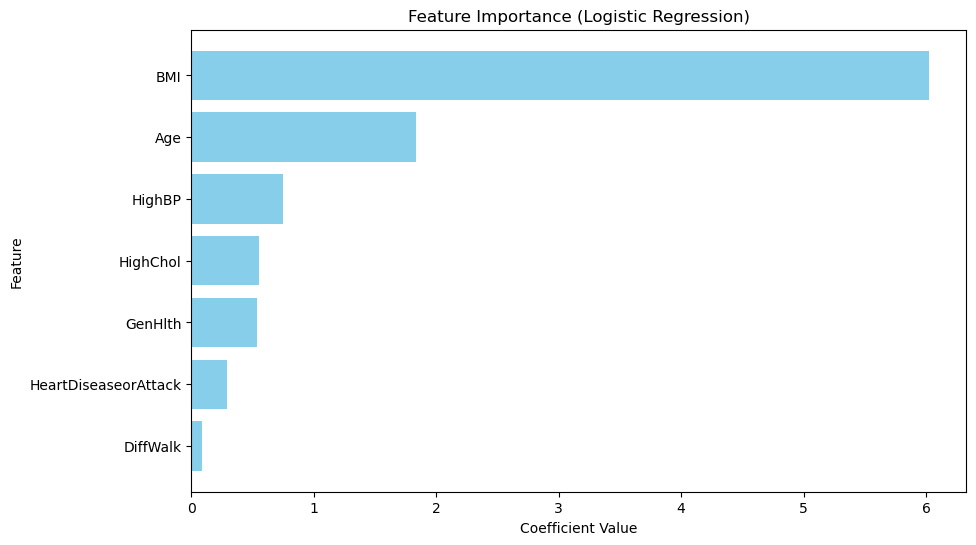

In [15]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = '/Users/maralbarkhordari/Desktop/Diabetes Health Indicators Dataset/cleaned_diabetes_data.csv' 
data_cleaned = pd.read_csv(file_path)

# Target variable
y = data_cleaned['Diabetes_binary']

# Selected features for Logistic Regression
selected_features = ['BMI', 'Age', 'HighBP', 'HighChol', 'GenHlth', 'DiffWalk', 'HeartDiseaseorAttack']
X_selected = data_cleaned[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Logistic Regression with balanced class weights
log_reg_model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model_balanced.fit(X_train, y_train)

# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': log_reg_model_balanced.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display feature importance
print("Feature Importance (Logistic Regression):")
print(feature_importance)

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


### Summary of Predictive Risk Factors for Diabetes

The table and visualization above highlight the most predictive risk factors for diabetes based on the coefficients from the Logistic Regression model with balanced class weights. Here's a summary:

#### Top Predictive Features:
- **BMI (Highest Coefficient):** Strongly predictive of diabetes risk.
- **Age:** Older individuals have a higher risk.
- **HighBP (High Blood Pressure):** A significant predictor.
- **HighChol (High Cholesterol):** Moderately predictive.
- **GenHlth (General Health):** Contributes meaningfully to diabetes risk.
- **HeartDiseaseorAttack:** Linked to higher diabetes risk.
- **DiffWalk (Difficulty Walking):** Least influential among the selected features but still relevant.

#### Observations:
- The positive coefficients indicate that higher values of these features are associated with increased diabetes risk.
- **BMI** and **Age** are the most impactful factors, suggesting the need to prioritize managing these risk factors for prevention.


# Summary and Results

## Objective
To identify the most predictive risk factors for diabetes using the Logistic Regression model and feature importance analysis.

## Key Predictive Features
- **BMI (Highest Coefficient):**  
  Strongly associated with diabetes risk. Higher BMI significantly increases the likelihood of diabetes.
- **Age:**  
  Older individuals are at higher risk of diabetes.
- **HighBP (High Blood Pressure):**  
  Positively correlated with diabetes, indicating a major risk factor.
- **HighChol (High Cholesterol):**  
  Moderate contributor to diabetes risk.
- **GenHlth (General Health):**  
  Poor self-reported health status is associated with higher diabetes risk.
- **HeartDiseaseorAttack:**  
  Indicates a strong link between cardiovascular issues and diabetes.
- **DiffWalk (Difficulty Walking):**  
  Reflects the role of physical mobility in diabetes risk.

## Insights from Logistic Regression
- The coefficients reveal the magnitude of influence each feature has on diabetes risk.
- **BMI** and **Age** stand out as the most impactful predictors.
- Managing BMI, blood pressure, and cholesterol levels could effectively reduce diabetes risk.

## Evaluation Metrics of the Model
- **Accuracy:** 72%  
- **Precision:** 32%  
- **Recall:** 75%  
- **F1-Score:** 45%  
- **ROC-AUC:** 80%  

These metrics indicate that the model balances identifying diabetes cases (high recall) with reasonable overall performance (ROC-AUC).
